In [1]:
import random
import copy
import logging
import sys

# from run_tests_201204 import *

import os
import sys
import importlib
from collections import defaultdict
sys.path.insert(0, '/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc')
from tools_pattern import get_eucledean_dist
import compress_pickle
import my_plot
from my_plot import MyPlotData, my_box_plot
import seaborn as sns

script_n = 'plot_210626_gt_grc_pcts'

data_script = 'batch_210623_dim_gt_grc_pct'
db_path = '/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc/dimensionality_sim2/' \
            f'{data_script}/'


scaled_noise = 0
core_noise = 0
n_mfs = 497
n_grcs = 1847

pattern_type = 'binary'
db = {}

for model in ['observed', 'local_random', 'global_random']:
    for scale in [1.0, .5]:
        model_name = f'{model}_{scale}'
        db[model_name] = compress_pickle.load(
            db_path + \
                f'{data_script}_{model}_{pattern_type}_{n_grcs}_{n_mfs}_'
                f'scale_{scale}_'
                f'0.3_512_40.gz')
    

Height: 3, Aspect: 1.3333333333333333


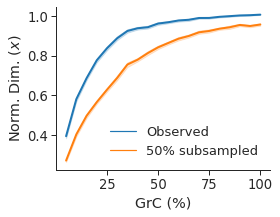

In [18]:

name_map = {
        'observed_1.0': "Observed",
        'observed_0.5': "50% subsampled",
}

palette = {
#     name_map['scaleup4']: sns.color_palette()[0],
#     name_map['global_random']: sns.color_palette()[1],
#     name_map['random']: sns.color_palette()[1],
#     name_map['local_random']: sns.color_palette()[2],
}


mpd = MyPlotData()
# ress_ref = db['local_random'][0][0]
# resss_ref2 = db['local_random'][0]
for model_name in [
        'observed_1.0',
        'observed_0.5',
        ]:
    resss = db[model_name]
    ress_tries = resss[0]  # get the first element in tuple
#     ress = ress[0]  # get the first try
    for n_try, ress in enumerate(ress_tries):
#         print(resss_ref2[0])
#         print(resss_ref2.keys())
#         if n_try >= len(resss_ref2):
#             print(n_try)
#             continue
#         ress_ref2 = resss_ref2[n_try]
#         noise = .3
#         for noise in ress:
    #         print(noise)
        for noise in ress:
            res = ress[noise]
            grc_dim2 = 1/res['grc_pop_corr']
            mpd.add_data_point(
                model=name_map[model_name],
                noise=noise*100,
                grc_dim=res['grc_dim'],
                grc_dim_norm=res['grc_dim']/79,
                grc_dim2=grc_dim2,
                grc_dim2_norm=grc_dim2/72,
                grc_by_mf_dim=res['grc_dim']/res['mf_dim'],
                num_grcs=res['num_grcs'],
                num_mfs=res['num_mfs'],
                voi=res['voi'],
                grc_pop_corr=res['grc_pop_corr'],
                binary_similarity=res['binary_similarity'],
                hamming_distance=res['hamming_distance'],
                normalized_mse=res['normalized_mse'],
                )

def custom_legend_fn(plt):
#     plt.legend(bbox_to_anchor=(1.025, .8), loc='upper left', borderaxespad=0.)
    plt.legend(loc='lower right', frameon=False, fontsize=13)

importlib.reload(my_plot); my_plot.my_relplot(
    mpd,
    x='noise',
    y='grc_dim2_norm',
    hue='model',
    context='paper',
#     context='talk',
#     palette=palette,
    linewidth=2,
#     log_scale_y=True,
    width=4,
    height=3,
#     ylim=[0, None],
    y_axis_label='Norm. Dim. ($x$)',
    x_axis_label='GrC (%)',
#     title='noise',
#     legend=None,
    save_filename=f'{script_n}_fig.svg',
    show=True,
    custom_legend_fn=custom_legend_fn,
    )


Height: 3, Aspect: 1.3333333333333333


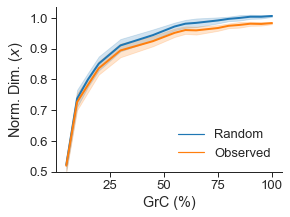

In [2]:

name_map = {
        'observed_1.0': "Observed",
        'local_random_1.0': "Random",
}

palette = {
#     name_map['scaleup4']: sns.color_palette()[0],
#     name_map['global_random']: sns.color_palette()[1],
#     name_map['random']: sns.color_palette()[1],
#     name_map['local_random']: sns.color_palette()[2],
}


mpd = MyPlotData()
# ress_ref = db['local_random'][0][0]
# resss_ref2 = db['local_random'][0]
for model_name in [
        'local_random_1.0',
        'observed_1.0',
#         'observed_0.5',
        ]:
    resss = db[model_name]
    ress_tries = resss[0]  # get the first element in tuple
#     ress = ress[0]  # get the first try
    for n_try, ress in enumerate(ress_tries):
#         print(resss_ref2[0])
#         print(resss_ref2.keys())
#         if n_try >= len(resss_ref2):
#             print(n_try)
#             continue
#         ress_ref2 = resss_ref2[n_try]
#         noise = .3
#         for noise in ress:
    #         print(noise)
        for noise in ress:
            if noise in [.25, .35, .40, .5, .70]:
                continue
            res = ress[noise]
            grc_dim2 = 1/res['grc_pop_corr']
            mpd.add_data_point(
                model=name_map[model_name],
                noise=noise*100,
                grc_dim=res['grc_dim'],
                grc_dim_norm=res['grc_dim']/81,
                grc_dim2=grc_dim2,
                grc_dim2_norm=grc_dim2/72,
                grc_by_mf_dim=res['grc_dim']/res['mf_dim'],
                num_grcs=res['num_grcs'],
                num_mfs=res['num_mfs'],
                voi=res['voi'],
                grc_pop_corr=res['grc_pop_corr'],
                binary_similarity=res['binary_similarity'],
                hamming_distance=res['hamming_distance'],
                normalized_mse=res['normalized_mse'],
                )

def custom_legend_fn(plt):
#     plt.legend(bbox_to_anchor=(1.025, .8), loc='upper left', borderaxespad=0.)
    plt.legend(loc='lower right', frameon=False, fontsize=13)

importlib.reload(my_plot); my_plot.my_relplot(
    mpd,
    x='noise',
    y='grc_dim_norm',
    hue='model',
    context='paper',
#     context='talk',
#     palette=palette,
    linewidth=2,
#     log_scale_y=True,
    width=4,
    height=3,
    ylim=[.5, None],
    y_axis_label='Norm. Dim. ($x$)',
    x_axis_label='GrC (%)',
#     title='noise',
#     legend=None,
#     save_filename=f'{script_n}_fig_vs_random.svg',
    show=True,
    custom_legend_fn=custom_legend_fn,
    )


Height: 3, Aspect: 1.3333333333333333


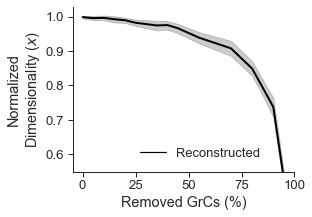

In [25]:

name_map = {
        'observed_1.0': "Reconstructed",
        'local_random_1.0': "Random",
}

palette = {
    'Reconstructed': 'black'
}


mpd = MyPlotData()
# ress_ref = db['local_random'][0][0]
# resss_ref2 = db['local_random'][0]
for model_name in [
#         'local_random_1.0',
        'observed_1.0',
#         'observed_0.5',
        ]:
    resss = db[model_name]
    ress_tries = resss[0]  # get the first element in tuple
#     ress = ress[0]  # get the first try
    for n_try, ress in enumerate(ress_tries):
#         print(resss_ref2[0])
#         print(resss_ref2.keys())
#         if n_try >= len(resss_ref2):
#             print(n_try)
#             continue
#         ress_ref2 = resss_ref2[n_try]
#         noise = .3
#         for noise in ress:
    #         print(noise)
        for noise in ress:
            if noise in [.25, .35, .40, .5, .70]:
                continue
            res = ress[noise]
            grc_dim2 = 1/res['grc_pop_corr']
            mpd.add_data_point(
                model=name_map[model_name],
                noise=noise*100,
                inv_noise=(1-noise)*100,
                grc_dim=res['grc_dim'],
#                 grc_dim_norm=res['grc_dim']/81,
                grc_dim_norm=res['grc_dim']/81,
                grc_dim_norm2=res['grc_dim']/79.75,
                grc_dim2=grc_dim2,
                grc_dim2_norm=grc_dim2/72,
                grc_by_mf_dim=res['grc_dim']/res['mf_dim'],
                num_grcs=res['num_grcs'],
                num_mfs=res['num_mfs'],
                voi=res['voi'],
                grc_pop_corr=res['grc_pop_corr'],
                binary_similarity=res['binary_similarity'],
                hamming_distance=res['hamming_distance'],
                normalized_mse=res['normalized_mse'],
                )

def custom_legend_fn(plt):
#     plt.legend(bbox_to_anchor=(1.025, .8), loc='upper left', borderaxespad=0.)
    plt.legend(loc='lower right', frameon=False, fontsize=13, bbox_to_anchor=(.9, 0))

importlib.reload(my_plot); my_plot.my_relplot(
    mpd,
    x='inv_noise',
    y='grc_dim_norm2',
    hue='model',
    context='paper',
    palette=palette,
#     context='talk',
#     palette=palette,
    linewidth=2,
#     log_scale_y=True,
    width=4,
    height=3,
    ylim=[.55, None],
    xlim=[None, 100],
    y_axis_label='Normalized\nDimensionality ($x$)',
    x_axis_label='Removed GrCs (%)',
#     title='noise',
#     legend=None,
    save_filename=f'{script_n}_fig_decrease.svg',
    show=True,
    custom_legend_fn=custom_legend_fn,
    )


Height: 3, Aspect: 1.3333333333333333


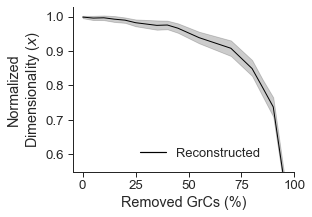

In [4]:

name_map = {
        'observed_1.0': "Reconstructed",
        'local_random_1.0': "Random",
}

palette = {
    'Reconstructed': 'black'
}


mpd = MyPlotData()
for model_name in [
        'observed_1.0',
        ]:
    resss = db[model_name]
    ress_tries = resss[0]  # get the first element in tuple
    for n_try, ress in enumerate(ress_tries):
        for noise in ress:
            if noise in [.25, .35, .40, .5, .70]:
                continue
            res = ress[noise]
            grc_dim2 = 1/res['grc_pop_corr']
            mpd.add_data_point(
                model=name_map[model_name],
                noise=noise*100,
                inv_noise=(1-noise)*100,
                grc_dim=res['grc_dim'],
                grc_dim_norm=res['grc_dim']/81,
                grc_dim_norm2=res['grc_dim']/79.75,
                grc_dim2=grc_dim2,
                grc_dim2_norm=grc_dim2/72,
                grc_by_mf_dim=res['grc_dim']/res['mf_dim'],
                num_grcs=res['num_grcs'],
                num_mfs=res['num_mfs'],
                voi=res['voi'],
                grc_pop_corr=res['grc_pop_corr'],
                binary_similarity=res['binary_similarity'],
                hamming_distance=res['hamming_distance'],
                normalized_mse=res['normalized_mse'],
                )

def custom_legend_fn(plt):
#     plt.legend(bbox_to_anchor=(1.025, .8), loc='upper left', borderaxespad=0.)
    plt.legend(loc='lower right', frameon=False, fontsize=13, bbox_to_anchor=(.9, 0))

importlib.reload(my_plot); my_plot.my_relplot(
    mpd,
    x='inv_noise',
    y='grc_dim_norm2',
    hue='model',
    context='paper',
    palette=palette,
    linewidth=1,
    width=4,
    height=3,
    ylim=[.55, None],
    xlim=[None, 100],
    y_axis_label='Normalized\nDimensionality ($x$)',
    x_axis_label='Removed GrCs (%)',
    save_filename=f'{script_n}_fig_decrease.svg',
    show=True,
    custom_legend_fn=custom_legend_fn,
    )


In [5]:
mpd.data

[{'model': 'Reconstructed',
  'noise': 5.0,
  'inv_noise': 95.0,
  'grc_dim': 49.40487624840819,
  'grc_dim_norm': 0.6099367438075085,
  'grc_dim_norm2': 0.619496880857783,
  'grc_dim2': 31.792856481330197,
  'grc_dim2_norm': 0.44156745112958606,
  'grc_by_mf_dim': 49.40487624840819,
  'num_grcs': 1847,
  'num_mfs': 643,
  'voi': 1.5712992220203934,
  'grc_pop_corr': 0.031453606585719426,
  'binary_similarity': 0.3060238486842112,
  'hamming_distance': 33.470703125,
  'normalized_mse': 0.1556487310500372},
 {'model': 'Reconstructed',
  'noise': 10.0,
  'inv_noise': 90.0,
  'grc_dim': 55.714734592836585,
  'grc_dim_norm': 0.6878362295411924,
  'grc_dim_norm2': 0.6986173616656625,
  'grc_dim2': 40.58074388847626,
  'grc_dim2_norm': 0.5636214428955036,
  'grc_by_mf_dim': 55.714734592836585,
  'num_grcs': 1847,
  'num_mfs': 643,
  'voi': 1.6996987704621838,
  'grc_pop_corr': 0.024642229396981817,
  'binary_similarity': 0.36394531250000045,
  'hamming_distance': 68.96484375,
  'normalized_m

Height: 4, Aspect: 1.5


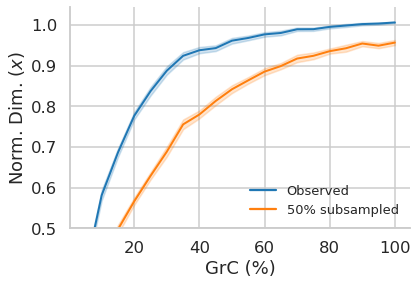

In [11]:

name_map = {
        'observed_1.0': "Observed",
        'observed_0.5': "50% subsampled",
}

palette = {
#     name_map['scaleup4']: sns.color_palette()[0],
#     name_map['global_random']: sns.color_palette()[1],
#     name_map['random']: sns.color_palette()[1],
#     name_map['local_random']: sns.color_palette()[2],
}


mpd = MyPlotData()
# ress_ref = db['local_random'][0][0]
# resss_ref2 = db['local_random'][0]
for model_name in [
        'observed_1.0',
        'observed_0.5',
        ]:
    resss = db[model_name]
    ress_tries = resss[0]  # get the first element in tuple
#     ress = ress[0]  # get the first try
    for n_try, ress in enumerate(ress_tries):
#         print(resss_ref2[0])
#         print(resss_ref2.keys())
#         if n_try >= len(resss_ref2):
#             print(n_try)
#             continue
#         ress_ref2 = resss_ref2[n_try]
#         noise = .3
#         for noise in ress:
    #         print(noise)
        for noise in ress:
            res = ress[noise]
            grc_dim2 = 1/res['grc_pop_corr']
            mpd.add_data_point(
                model=name_map[model_name],
                noise=noise*100,
                grc_dim=res['grc_dim'],
                grc_dim_norm=res['grc_dim']/79,
                grc_dim2=grc_dim2,
                grc_dim2_norm=grc_dim2/72,
                grc_by_mf_dim=res['grc_dim']/res['mf_dim'],
                num_grcs=res['num_grcs'],
                num_mfs=res['num_mfs'],
                voi=res['voi'],
                grc_pop_corr=res['grc_pop_corr'],
                binary_similarity=res['binary_similarity'],
                hamming_distance=res['hamming_distance'],
                normalized_mse=res['normalized_mse'],
                )

def custom_legend_fn(plt):
#     plt.legend(bbox_to_anchor=(1.025, .8), loc='upper left', borderaxespad=0.)
    plt.legend(loc='lower right', frameon=False, fontsize=13)

importlib.reload(my_plot); my_plot.my_relplot(
    mpd,
    x='noise',
    y='grc_dim2_norm',
    hue='model',
#     context='paper',
    context='talk',
#     palette=palette,
    linewidth=2,
#     log_scale_y=True,
    width=6,
    height=4,
    ylim=[.5, None],
    y_axis_label='Norm. Dim. ($x$)',
    x_axis_label='GrC (%)',
#     title='noise',
#     legend=None,
    save_filename=f'{script_n}_fig_plus.svg',
    show=True,
    custom_legend_fn=custom_legend_fn,
    )


Height: 3, Aspect: 1.3333333333333333


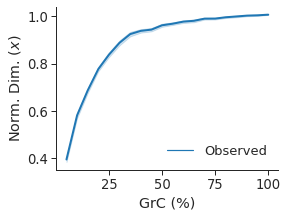

In [8]:

name_map = {
        'observed_1.0': "Observed",
        'observed_0.5': "50% subsampled",
}

palette = {
#     name_map['scaleup4']: sns.color_palette()[0],
#     name_map['global_random']: sns.color_palette()[1],
#     name_map['random']: sns.color_palette()[1],
#     name_map['local_random']: sns.color_palette()[2],
}


mpd = MyPlotData()
# ress_ref = db['local_random'][0][0]
# resss_ref2 = db['local_random'][0]
for model_name in [
        'observed_1.0',
#         'observed_0.5',
        ]:
    resss = db[model_name]
    ress_tries = resss[0]  # get the first element in tuple
#     ress = ress[0]  # get the first try
    for n_try, ress in enumerate(ress_tries):
#         print(resss_ref2[0])
#         print(resss_ref2.keys())
#         if n_try >= len(resss_ref2):
#             print(n_try)
#             continue
#         ress_ref2 = resss_ref2[n_try]
#         noise = .3
#         for noise in ress:
    #         print(noise)
        for noise in ress:
            res = ress[noise]
            grc_dim2 = 1/res['grc_pop_corr']
            mpd.add_data_point(
                model=name_map[model_name],
                noise=noise*100,
                grc_dim=res['grc_dim'],
                grc_dim_norm=res['grc_dim']/79,
                grc_dim2=grc_dim2,
                grc_dim2_norm=grc_dim2/72,
                grc_by_mf_dim=res['grc_dim']/res['mf_dim'],
                num_grcs=res['num_grcs'],
                num_mfs=res['num_mfs'],
                voi=res['voi'],
                grc_pop_corr=res['grc_pop_corr'],
                binary_similarity=res['binary_similarity'],
                hamming_distance=res['hamming_distance'],
                normalized_mse=res['normalized_mse'],
                )

def custom_legend_fn(plt):
#     plt.legend(bbox_to_anchor=(1.025, .8), loc='upper left', borderaxespad=0.)
    plt.legend(loc='lower right', frameon=False, fontsize=13)

importlib.reload(my_plot); my_plot.my_relplot(
    mpd,
    x='noise',
    y='grc_dim2_norm',
    hue='model',
    context='paper',
#     palette=palette,
    linewidth=2,
#     log_scale_y=True,
    width=4,
    height=3,
#     ylim=[0, None],
    y_axis_label='Norm. Dim. ($x$)',
    x_axis_label='GrC (%)',
#     title='noise',
#     legend=None,
    save_filename=f'{script_n}_observed.svg',
    show=True,
    custom_legend_fn=custom_legend_fn,
    )


Height: 4.135338345864661, Aspect: 1.33


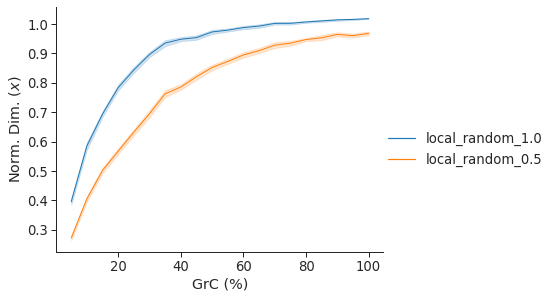

In [24]:

name_map = {
        'scaleup4': "Observed",
        'global_random': "Global Random",
        'random': "Global Random",
        'local_random': "Local Random",
}

palette = {
    name_map['scaleup4']: sns.color_palette()[0],
    name_map['global_random']: sns.color_palette()[1],
    name_map['random']: sns.color_palette()[1],
    name_map['local_random']: sns.color_palette()[2],
}


mpd = MyPlotData()
# ress_ref = db['local_random'][0][0]
# resss_ref2 = db['local_random'][0]
for model_name in [
#         'observed_1.0',
#         'observed_0.5',
        'local_random_1.0',
        'local_random_0.5',
        ]:
    resss = db[model_name]
    ress_tries = resss[0]  # get the first element in tuple
#     ress = ress[0]  # get the first try
    for n_try, ress in enumerate(ress_tries):
#         print(resss_ref2[0])
#         print(resss_ref2.keys())
#         if n_try >= len(resss_ref2):
#             print(n_try)
#             continue
#         ress_ref2 = resss_ref2[n_try]
#         noise = .3
#         for noise in ress:
    #         print(noise)
        for noise in ress:
            res = ress[noise]
            grc_dim2 = 1/res['grc_pop_corr']
            mpd.add_data_point(
                model=model_name,
                noise=noise*100,
                grc_dim=res['grc_dim'],
                grc_dim_norm=res['grc_dim']/79,
                grc_dim2=grc_dim2,
                grc_dim2_norm=grc_dim2/72,
                grc_by_mf_dim=res['grc_dim']/res['mf_dim'],
                num_grcs=res['num_grcs'],
                num_mfs=res['num_mfs'],
                voi=res['voi'],
                grc_pop_corr=res['grc_pop_corr'],
                binary_similarity=res['binary_similarity'],
                hamming_distance=res['hamming_distance'],
                normalized_mse=res['normalized_mse'],
                )

importlib.reload(my_plot); my_plot.my_relplot(
    mpd,
    x='noise',
    y='grc_dim2_norm',
    hue='model',
    context='paper',
#     palette=palette,
    linewidth=1,
#     log_scale_y=True,
    width=5.5,
#     ylim=[0, None],
    y_axis_label='Norm. Dim. ($x$)',
    x_axis_label='GrC (%)',
#     title='noise',
#     legend=None,
    save_filename=f'{script_n}_local.svg',
    show=True,
    )


Height: 4.135338345864661, Aspect: 1.33


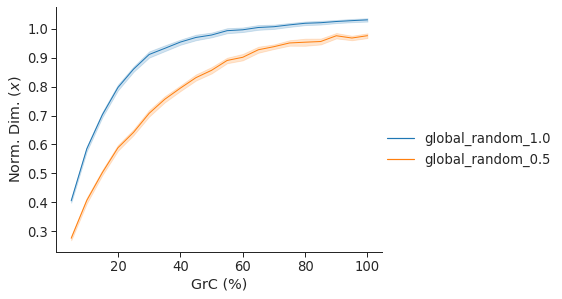

In [25]:

name_map = {
        'scaleup4': "Observed",
        'global_random': "Global Random",
        'random': "Global Random",
        'local_random': "Local Random",
}

palette = {
    name_map['scaleup4']: sns.color_palette()[0],
    name_map['global_random']: sns.color_palette()[1],
    name_map['random']: sns.color_palette()[1],
    name_map['local_random']: sns.color_palette()[2],
}


mpd = MyPlotData()
# ress_ref = db['local_random'][0][0]
# resss_ref2 = db['local_random'][0]
for model_name in [
#         'observed_1.0',
#         'observed_0.5',
#         'local_random_1.0',
#         'local_random_0.5',
        'global_random_1.0',
        'global_random_0.5',
        ]:
    resss = db[model_name]
    ress_tries = resss[0]  # get the first element in tuple
#     ress = ress[0]  # get the first try
    for n_try, ress in enumerate(ress_tries):
#         print(resss_ref2[0])
#         print(resss_ref2.keys())
#         if n_try >= len(resss_ref2):
#             print(n_try)
#             continue
#         ress_ref2 = resss_ref2[n_try]
#         noise = .3
#         for noise in ress:
    #         print(noise)
        for noise in ress:
            res = ress[noise]
            grc_dim2 = 1/res['grc_pop_corr']
            mpd.add_data_point(
                model=model_name,
                noise=noise*100,
                grc_dim=res['grc_dim'],
                grc_dim_norm=res['grc_dim']/79,
                grc_dim2=grc_dim2,
                grc_dim2_norm=grc_dim2/72,
                grc_by_mf_dim=res['grc_dim']/res['mf_dim'],
                num_grcs=res['num_grcs'],
                num_mfs=res['num_mfs'],
                voi=res['voi'],
                grc_pop_corr=res['grc_pop_corr'],
                binary_similarity=res['binary_similarity'],
                hamming_distance=res['hamming_distance'],
                normalized_mse=res['normalized_mse'],
                )

importlib.reload(my_plot); my_plot.my_relplot(
    mpd,
    x='noise',
    y='grc_dim2_norm',
    hue='model',
    context='paper',
#     palette=palette,
    linewidth=1,
#     log_scale_y=True,
    width=5.5,
#     ylim=[0, None],
    y_axis_label='Norm. Dim. ($x$)',
    x_axis_label='GrC (%)',
#     title='noise',
#     legend=None,
    save_filename=f'{script_n}_global.svg',
    show=True,
    )
